In [1]:
import re
import csv

# 创建字典来组织数据
data = {}
current_key = None

num_list = [16, 17, 43, 67, 103]
# 给定的文本
for i in num_list:
    # text_path = f"Net1d_NewGroup_randomindex2/v11_24_net1d_NewGroup{i+1}/1e-6.log"
    text_path = f"Net1d_Split1_denoise\PAF_net1d_SplitDenoise_FirstNum-{i}/test_RemoveBad_{i}.log"
    text = open(text_path, 'r').read()
    # 正则表达式
    pattern = re.compile(r'- Epoch: 9[\s\S]*?Test_accuracy: ([\d.]+)[\s\S]*?Test_recall: ([\d.]+)[\s\S]*?Test_precision: ([\d.]+)[\s\S]*?test_F1: ([\d.]+)[\s\S]*?test_AUC: ([\d.]+)[\s\S]*?', re.MULTILINE)

    # 匹配字符串
    matches = re.findall(pattern, text)
    # print(matches)

    for match in matches:
        # print(match)
        test_accuracy, test_recall, test_precision, test_f1, test_auc = match
        if data.get(i+1) == None:
            data[i+1] = {}
        data[i+1]['Test_accuracy'] = test_accuracy
        data[i+1]['Test_recall'] = test_recall
        data[i+1]['Test_precision'] = test_precision
        data[i+1]['test_F1'] = test_f1
        data[i+1]['test_AUC'] = test_auc


acc_list = []
recall_list = []
precision_list = []
f1_list = []
auc_list = []
for index, values in data.items():
    acc_list.append(eval(values.get('Test_accuracy')))
    recall_list.append(eval(values.get('Test_recall')))
    precision_list.append(eval(values.get('Test_precision')))
    f1_list.append(eval(values.get('test_F1')))
    auc_list.append(eval(values.get('test_AUC')))
length = len(acc_list)

num = 5
# 创建CSV文件并写入数据
with open('data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Index'
                    #  , 'Train_loss'
                    #  , 'Train_accuracy'
                    #  , 'Test_loss'
                     , 'Test_accuracy'
                    #  ,'Train_recall'
                     , 'Test_recall'
                    #  , 'Train_precision'
                     , 'Test_precision'
                    #  ,'train_F1'
                     , 'test_F1'
                    #  , 'train_AUC'
                     , 'test_AUC'])  # 写入标题行
    for epoch, values in data.items():
        writer.writerow([epoch,
                        #  values.get('Train_loss', ''),
                        #  values.get('Train_accuracy', ''),
                        #  values.get('Test_loss', ''),
                         values.get('Test_accuracy', ''),
                        #  values.get('Train_recall', ''),
                         values.get('Test_recall', ''),
                        #  values.get('Train_precision', ''),
                         values.get('Test_precision', ''),
                        #  values.get('train_F1', ''),
                         values.get('test_F1', ''),
                        #  values.get('train_AUC', ''),
                         values.get('test_AUC', '')])
    writer.writerow(['avg'
                     , round(sum(acc_list)/len(acc_list), 2)
                     , round(sum(recall_list)/len(recall_list), 2)
                     , round(sum(precision_list)/len(precision_list), 2)
                     , round(sum(f1_list)/len(f1_list), 2)
                     , round(sum(auc_list)/len(auc_list), 2)
                     ])

print("Data has been written to data.csv")
# text.close()


('55.74639', '26.05697', '46.38102', '33.36781', '47.7093')
('54.14167', '55.60746', '46.70394', '50.76829', '56.5360')
('55.40089', '58.79020', '48.00464', '52.85279', '58.3804')
('55.96131', '56.38111', '48.46588', '52.12472', '58.3521')
('53.70393', '57.58731', '46.42156', '51.40509', '56.4022')
('54.61192', '56.56493', '47.18797', '51.45272', '57.1525')
('53.84353', '57.22157', '46.52420', '51.32137', '56.3470')
('55.50544', '57.27416', '48.05291', '52.25988', '58.2272')
('56.36661', '52.75635', '48.79028', '50.69586', '57.6748')
('55.73428', '59.21848', '48.32575', '53.22047', '58.6048')
('55.81273', '57.78393', '48.36066', '52.65400', '58.4499')
('38.71296', '60.43177', '37.49020', '46.27356', '44.9772')
('61.49414', '67.76893', '54.78277', '60.58781', '68.0242')
('60.95206', '68.31490', '54.20170', '60.44542', '68.0781')
('60.01436', '66.39388', '53.39568', '59.18957', '66.1708')
('59.58016', '64.95089', '53.04219', '58.39558', '65.3452')
('60.98713', '67.70992', '54.27741', '60

## 混淆矩阵绘制

confusion [[113188, 34944], [42303, 122653]]
len(confusion) 2


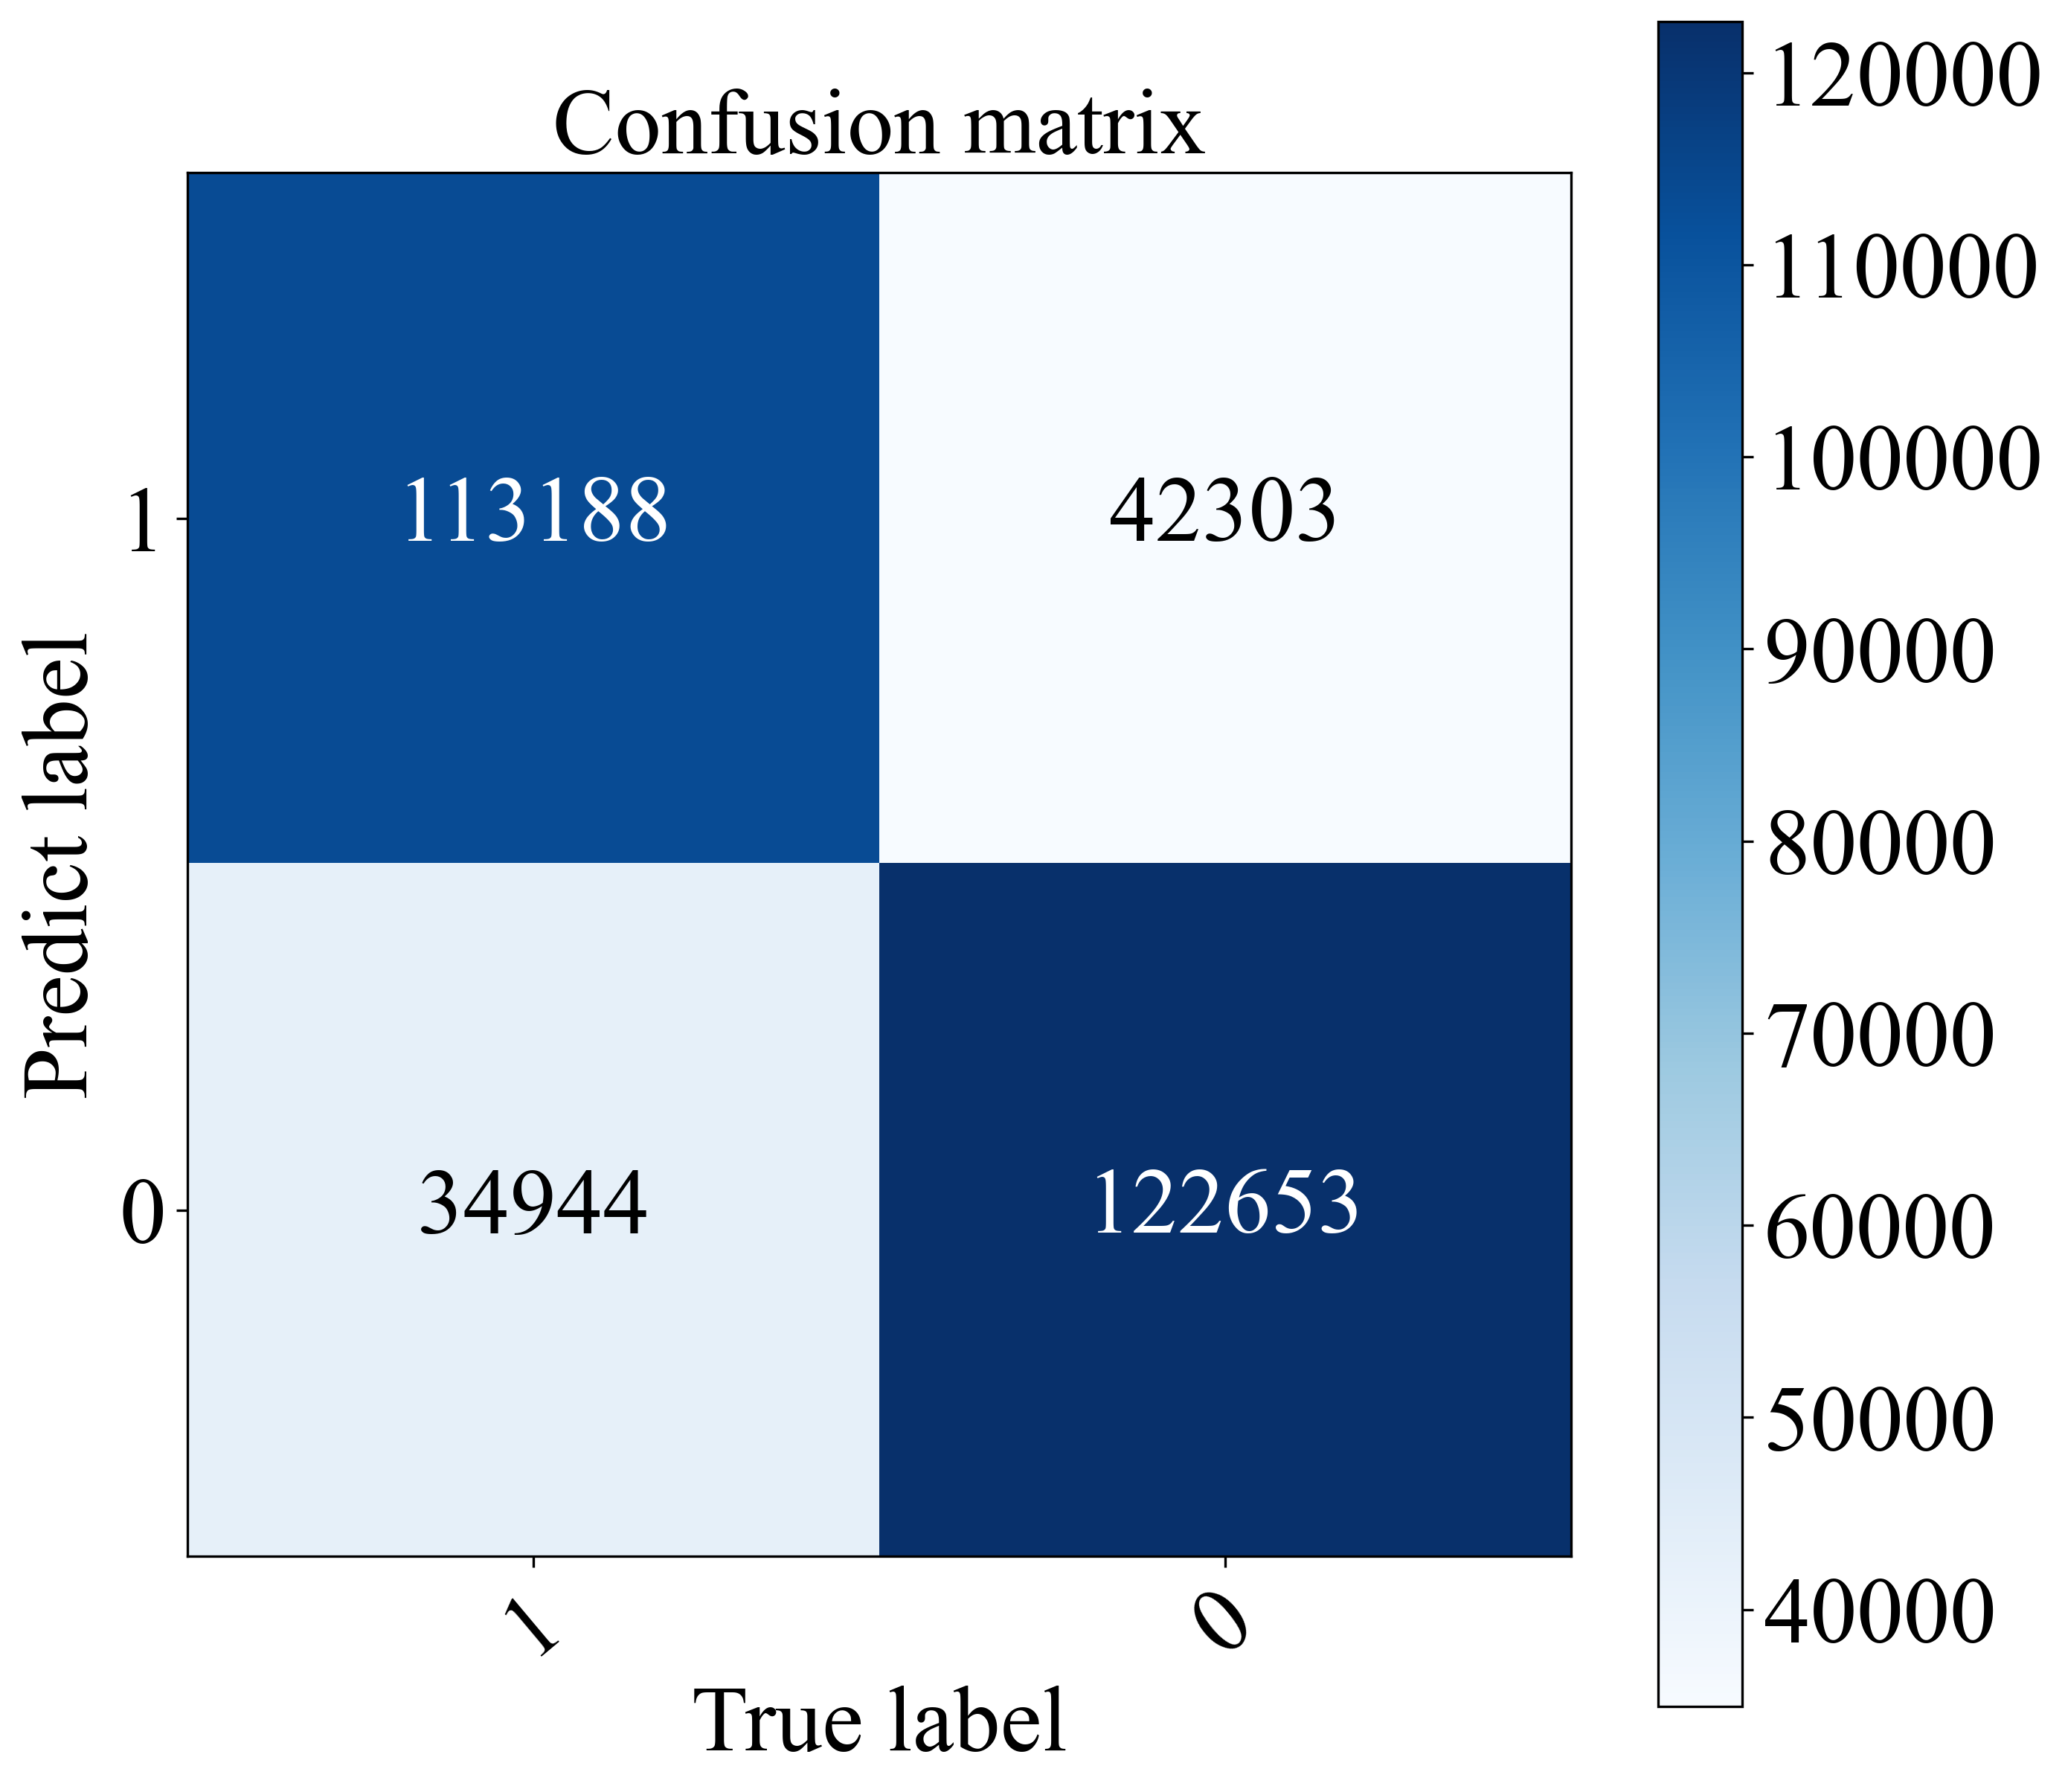

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import os
matplotlib.rcParams.update({'font.size':30
                            , 'font.family': 'Times New Roman'
                            , 'axes.labelsize': 30
                            , 'axes.titlesize': 30
                            , 'xtick.labelsize': 30
                            , 'ytick.labelsize': 30
                            , 'legend.fontsize': 30
                            , 'figure.titlesize': 30
                            , 'figure.dpi': 300})
 
guess = ["0","1"]
fact = ["0","1"]
classes = list(set(fact))
classes.sort(reverse=True)
r1=[ [113188,34944]
    ,[42303,122653]]
# predict
# 1 
# 0
# label 1 0
# len(tn), len(fn), len(fp), len(tp), :    
plt.figure(figsize=(10, 10))       #设置plt窗口的大小
confusion =r1
print("confusion",confusion)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
indices2 = range(3)
plt.xticks(indices, classes,rotation=40)
plt.yticks([0.00,1.00], classes)
plt.ylim(1.5 , -0.5)   #设置y的纵坐标的上下限
 
plt.title("Confusion matrix")
#设置color bar的标签大小
cb=plt.colorbar()
cb.ax.tick_params()
plt.xlabel('True label')
plt.ylabel('Predict label')
 
print("len(confusion)",len(confusion))
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
 
        if confusion[first_index][second_index]>100000:
            color="w"
        else:
            color="black"
        plt.text(first_index, second_index, confusion[first_index][second_index], color = color,verticalalignment='center',horizontalalignment='center',)
save_path = "./DenoiseResult/confusion_matrix.png"
if not os.path.exists("./DenoiseResult"):
    os.makedirs("./DenoiseResult")
plt.savefig(save_path)
plt.show()

# 聚类判断异常点所占比例

In [ ]:
import wfdb
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from mne.filter import filter_data

all_data_path = r"PAF\coding\lj\all_data"
small_data_path = r"PAF\coding\lj\data"

# ukbb 效果提取

In [ ]:
import re
import csv

# 创建字典来组织数据
data = {}
current_key = None

num_list = [16, 17, 43, 67, 103]
# 给定的文本
for i in num_list:
    # text_path = f"Net1d_NewGroup_randomindex2/v11_24_net1d_NewGroup{i+1}/1e-6.log"
    text_path = f"ukbb/test_model{i}.pth.log"
    text = open(text_path, 'r').read()
    # 正则表达式
    pattern = re.compile(r'\
                        #  - Epoch: 9[\s\S]*?\
                         Test_accuracy: ([\d.]+)[\s\S]*?Test_recall: ([\d.]+)[\s\S]*?Test_precision: ([\d.]+)[\s\S]*?test_F1: ([\d.]+)[\s\S]*?test_AUC: ([\d.]+)[\s\S]*?', re.MULTILINE)

    # 匹配字符串
    matches = re.findall(pattern, text)
    # print(matches)

    for match in matches:
        # print(match)
        test_accuracy, test_recall, test_precision, test_f1, test_auc = match
        if data.get(i+1) == None:
            data[i+1] = {}
        data[i+1]['Test_accuracy'] = test_accuracy
        data[i+1]['Test_recall'] = test_recall
        data[i+1]['Test_precision'] = test_precision
        data[i+1]['test_F1'] = test_f1
        data[i+1]['test_AUC'] = test_auc


acc_list = []
recall_list = []
precision_list = []
f1_list = []
auc_list = []
for index, values in data.items():
    acc_list.append(eval(values.get('Test_accuracy')))
    recall_list.append(eval(values.get('Test_recall')))
    precision_list.append(eval(values.get('Test_precision')))
    f1_list.append(eval(values.get('test_F1')))
    auc_list.append(eval(values.get('test_AUC')))
length = len(acc_list)

num = 5
# 创建CSV文件并写入数据
with open('ukbb/resultData.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Index'
                    #  , 'Train_loss'
                    #  , 'Train_accuracy'
                    #  , 'Test_loss'
                     , 'Test_accuracy'
                    #  ,'Train_recall'
                     , 'Test_recall'
                    #  , 'Train_precision'
                     , 'Test_precision'
                    #  ,'train_F1'
                     , 'test_F1'
                    #  , 'train_AUC'
                     , 'test_AUC'])  # 写入标题行
    for epoch, values in data.items():
        writer.writerow([epoch,
                        #  values.get('Train_loss', ''),
                        #  values.get('Train_accuracy', ''),
                        #  values.get('Test_loss', ''),
                         values.get('Test_accuracy', ''),
                        #  values.get('Train_recall', ''),
                         values.get('Test_recall', ''),
                        #  values.get('Train_precision', ''),
                         values.get('Test_precision', ''),
                        #  values.get('train_F1', ''),
                         values.get('test_F1', ''),
                        #  values.get('train_AUC', ''),
                         values.get('test_AUC', '')])
    writer.writerow(['avg'
                     , round(sum(acc_list)/len(acc_list), 2)
                     , round(sum(recall_list)/len(recall_list), 2)
                     , round(sum(precision_list)/len(precision_list), 2)
                     , round(sum(f1_list)/len(f1_list), 2)
                     , round(sum(auc_list)/len(auc_list), 2)
                     ])

print("Data has been written to data.csv")
# text.close()
